# Classificação de vídeos de LIBRAS
- link do exemplo como base: https://keras.io/examples/vision/3D_image_classification/

# Importações necessárias

In [19]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import sys
import argparse
import cv2

from tensorflow import keras
from tensorflow.keras import layers

# Variáveis Globais

In [20]:
train_size      = 7  # Tamanho dos dados para treinamento
batch_size      = 10 # Tamanho total dos dados de treinamento e validação
num_of_frames   = 12 # Número de frames que o vídeo será dividido
width           = 80 # Largura da imagem
height          = 80 # Altura da imagem
num_of_channels = 1  # Número de canais da imagem (cinza, RGB, etc.)

# Download do opencv

In [5]:
!pip install opencv-python

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# Função para transformar o vídeo em frames

In [21]:
def extractImages(pathIn, pathOut):
    count = 0
    vidcap = cv2.VideoCapture(pathIn)
    success,image = vidcap.read()
    success = True
    while success and count < 6:
        # 1000 = 1 segundo, 500 = meio segundo...
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*500)) # seta o momento do vídeo para pegar o frame
        success, image = vidcap.read() # pega de fato o frame, e se deu sucesso ou não
        print ('Read a new frame: ', success)
        cv2.imwrite( pathOut + "\\frame%d.jpg" % count, image)     # save frame as JPEG file
        count = count + 1

# Chamada da função de transformar vídeos em frames

In [3]:
for i in range(5):
    index = i + 1
    varInput  = "./LIBRAS-Dataset/Sinalizador01/01AcontecerSinalizador01-{}.mp4".format(index)
    varOutput = "./Frames/Sinalizador01/Acontecer/0{}".format(index)
    extractImages(varInput, varOutput)

NameError: name 'extractImages' is not defined

# Transformação dos frames para uma variável e junção dos arquivos no formato ideal para entrada da 3DCNN

In [22]:
video_folder = './LIBRAS-Dataset/Acontecer/' # caminho da pasta com os arquivos
X_data = [] # armazena os frames
Y_data = [] # armazena as labels
list_of_videos = os.listdir(video_folder) # pega o nome de todos os arquivos dentro da pasta

# print(list_of_videos)

# pega o nome de cada arquivo de vídeo e passa para transformar em frames
for i in list_of_videos:
    # caminho do vídeo
    vid = str(video_folder + i)
    # lê o vídeo
    cap = cv2.VideoCapture(vid)
    frames = [] # armazenar os frames
    count = 0 # contador para pegar cada frame
    for j in range(num_of_frames): # aqui pegamos n frames de acordo com num_of_frames
        # 1000 = 1 segundo, 500 = meio segundo...
        cap.set(cv2.CAP_PROP_POS_MSEC,(count*250)) # seta o momento do vídeo para pegar o frame
        ret, frame = cap.read() # pega de fato o frame, e se deu sucesso ou não
        if ret == True: # se deu sucesso...
            print('Sucesso!')
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # converte o frame para cinza
            frame = cv2.resize(frame,(width,height),interpolation=cv2.INTER_AREA) # redimensiona o frame
            frames.append(frame) # adiciona o frame para o vetor de frames
        else:
            print('Erro!')
        count = count + 1
    X_data.append(frames) # adiciona todos os frames de um vídeo
    Y_data.append(1) # adiciona a label do conjunto de frames
X_data = np.array(X_data) # transforma o vetor de frames em array numpy
Y_data = np.array(Y_data) # transforma o vetor de label dos frames em array numpy

Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
Sucesso!
S

In [101]:
# !pip install matplotlib

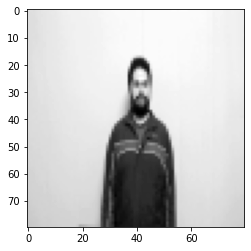

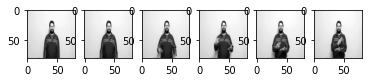

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

# converte a imagem de numpy para Image
image0 = Image.fromarray(X_data[0][0])
image1 = Image.fromarray(X_data[0][1])
image2 = Image.fromarray(X_data[0][2])
image3 = Image.fromarray(X_data[0][3])
image4 = Image.fromarray(X_data[0][4])
image5 = Image.fromarray(X_data[0][5])

# plota as imagens
plt.imshow(image0, 'gray')
f, axarr = plt.subplots(1, 6)
axarr[0].imshow(image0, 'gray')
axarr[1].imshow(image1, 'gray')
axarr[2].imshow(image2, 'gray')
axarr[3].imshow(image3, 'gray')
axarr[4].imshow(image4, 'gray')
axarr[5].imshow(image5, 'gray')

# Remodelar o conjunto de dados
Exemplo:
So, if you have 10000 samples in total, using sets of 10 frames per input, with 30 x 30 dimensions and 1 channel of color, you may reshape your X_data like:

X_data = X_data.reshape(10000, 10, 30, 30, 1)

In [24]:
# transforma os dados dos frames armazenados no formato ideal para ser usado no treinamento
X_data = X_data.reshape(batch_size, num_of_frames, width, height, num_of_channels)
print(np.shape(X_data))

(10, 12, 80, 80, 1)


# Criar conjunto de dados para treinamento

In [25]:
# Divide os dados entre treinamento e teste
x_train = X_data[:train_size] #treinamento
y_train = Y_data[:train_size] #treinamento
x_val   = X_data[train_size:] #teste
y_val   = Y_data[train_size:] #teste

print("Número de amostras para treino e validação são %d e %d."% (x_train.shape[0], x_val.shape[0]))

Número de amostras para treino e validação são 7 e 3.


# Definição da Rede Neural Convolucional 3D 

In [26]:
 def get_model():
    
    # Camadas do modelo
    
    model = keras.Sequential()

    model.add(keras.layers.Conv3D(32, (5,5,3), activation='relu', input_shape=(num_of_frames, width, height, num_of_channels)))

    model.add(keras.layers.MaxPooling3D((2, 2, 1), padding='same'))

    model.add(keras.layers.Conv3D(32, (3,3,3), activation='relu'))

    model.add(keras.layers.MaxPooling3D((2, 2, 1), padding='same'))

    model.add(keras.layers.Conv3D(32, (1,1,3), activation='relu'))

    model.add(keras.layers.Flatten())
#     model.add(keras.layers.Dense(200, activation='sigmoid'))
#     model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return model

# Constrói o modelo.
model = get_model()

# Dados do modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_12 (Conv3D)           (None, 8, 76, 78, 32)     2432      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 4, 38, 78, 32)     0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 2, 36, 76, 32)     27680     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 1, 18, 76, 32)     0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 1, 18, 74, 32)     3104      
_________________________________________________________________
flatten_4 (Flatten)          (None, 42624)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

# Treinamento do Modelo

In [27]:
# Compila o modelo.
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Treina o modelo
epochs = 100
model.fit(x_train, y_train, epochs=epochs, batch_size=train_size)

Epoch 1/100
1/1 [==============================] - 1s 583ms/step - loss: 1.1335 - acc: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 127ms/step - loss: 1.7567e-15 - acc: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 123ms/step - loss: 2.8135e-26 - acc: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 123ms/step - loss: 5.4502e-35 - acc: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 122ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 121ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 11/100
1/1 [=====

1/1 [==============================] - 0s 122ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 121ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 122ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 131ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 121ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 92/100
1/1 [==============================] - 0s 120ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 93/100
1/1 [=====

# Validação do modelo

In [10]:
model.evaluate(x_val, y_val)

1/1 [==============================] - 0s 353ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]